In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import backprop
import gp_backprop

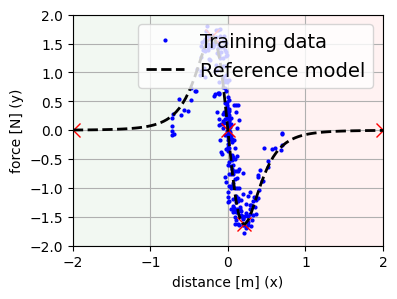

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/magman.csv')
S.split()
S.plot(width=4, height=3)

S.index()
numbs.init(S)

In [13]:
population = gp_backprop.random_population(popsize=1, max_depth=2)
best_stree, best_eval = gp_backprop.evaluate(population, S)

((A(x) * B(x)) + (C(x) * D(x)))
--- ASP Model ---
sign_unkn("D","+",-4,-3) sign_unkn("D","+",-3,-2) sign_unkn("D","+",-2,-1) sign_unkn("D","+",-1,0) sign_unkn("D","-",0,1) sign_unkn("D","-",1,2) sign_unkn("D","-",2,3) sign_unkn("D","-",3,4) sign_unkn("B","+",-4,-3) sign_unkn("B","+",-3,-2) sign_unkn("B","+",-2,-1) sign_unkn("B","+",-1,0) sign_unkn("B","+",0,1) sign_unkn("B","+",1,2) sign_unkn("B","+",2,3) sign_unkn("B","+",3,4) sign_unkn("C","+",-4,-3) sign_unkn("C","+",-3,-2) sign_unkn("C","+",-2,-1) sign_unkn("C","+",-1,0) sign_unkn("C","+",0,1) sign_unkn("C","+",1,2) sign_unkn("C","+",2,3) sign_unkn("C","+",3,4) sign_unkn("A","+",-4,-3) sign_unkn("A","+",-3,-2) sign_unkn("A","+",-2,-1) sign_unkn("A","+",-1,0) sign_unkn("A","-",0,1) sign_unkn("A","-",1,2) sign_unkn("A","-",2,3) sign_unkn("A","-",3,4) sign_unkn("D'","-",1,2) sign_unkn("D'","-",2,3) sign_unkn("D'","-",3,4) sign_unkn("D'","-",-4,-3) sign_unkn("D'","-",-3,-2) sign_unkn("D'","-",-2,-1) sign_unkn("D'","-",0,1) sign_unkn("D

--- Best Syntax Tree ---
((A(x) * B(x)) + (C(x) * D(x)))
Training
	mse: 0.7984791312429319
	rmse: 0.8935765950621871
	r2: 0.23759810000212855
Testing
	mse: 0.8464392645885055
	rmse: 0.9200213392027956
	r2: 0.20426661363479792
Knowledge
	mse: 0.13467906756402956
	rmse: 0.3669864678214029



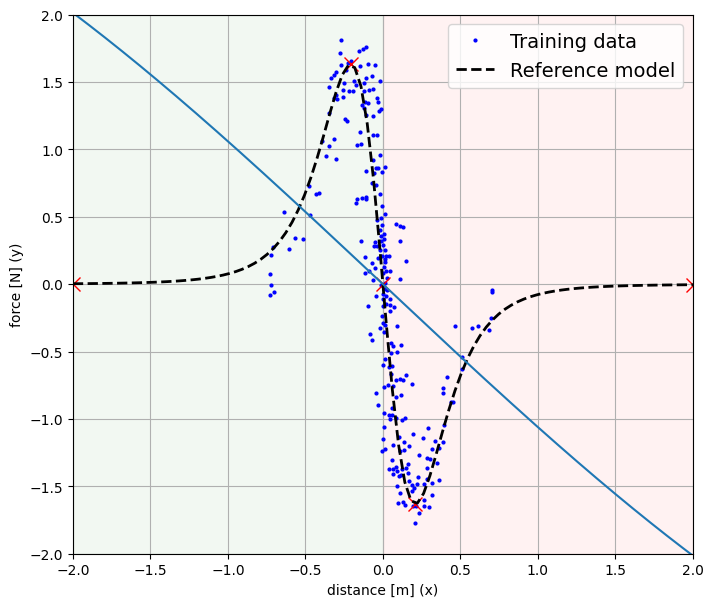

In [14]:
print("--- Best Syntax Tree ---")
print(best_stree)
print(best_eval)

if best_stree is not None:
    S.plot(width=8, height=7)
    xp = np.linspace(S.xl, S.xu, 500)
    plt.plot(xp, best_stree.compute_output(xp));
    plt.show()

In [15]:
if best_stree is not None:
    unkn_collector = backprop.UnknownSyntaxTreeCollector()
    best_stree.accept(unkn_collector)
    for unkn_label in unkn_collector.unknown_labels:
        print(f"{unkn_label}(x) =\n{best_stree.get_unknown_stree(unkn_label).model}\n")

C(x) =
           6             4            2
2.499e-07 x - 5.144e-05 x + 0.006324 x - 0.368

A(x) =
 
-0.1792 x

B(x) =
 
0

D(x) =
 
2.932 x

